## Import Libaries & Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


## Visualization

Text(0, 0.5, 'Height')

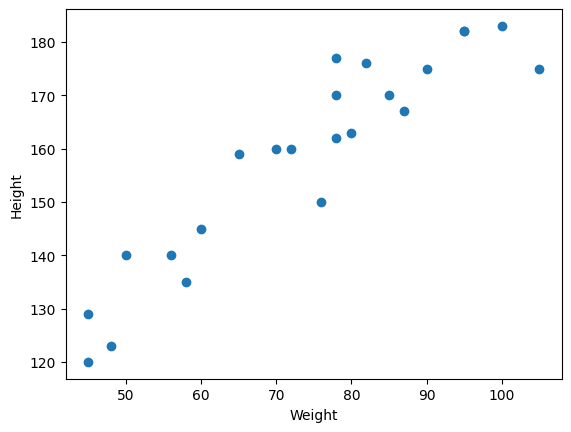

In [11]:
## scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [12]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


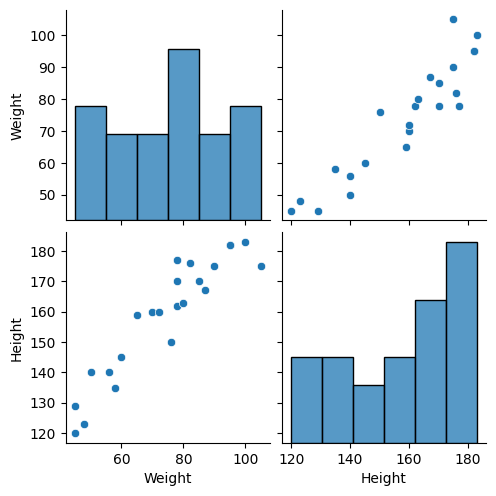

In [16]:
sns.pairplot(df)

## Split Feature in Independent & Dependent Features

In [ ]:
X = df[['Weight']]  ## Independent feature has to be df by using extra []  or 2d array - np.array(X)
X.shape

(23, 1)

In [ ]:
Y = df['Height']    ## Dependent feature can be series or 1d array 
y.shape

(23,)

## Train test split

In [63]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 40 )

## Standardisation ( for good for linear regression algorithm)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
## as column are not in same scale like weight is mostly less than 100 but height is more than 100 cm, 
## we want model not to think bigger no is better hence, we need to standardise the data

X_train = scaler.fit_transform(X_train)  
# fit_transform learns the mean & std from the training data and scales X_train.
# This makes the training data have mean = 0 and std = 1.


X_test = scaler.transform(X_test)       
# transform reuse the mean & sd of train data to scale X_test. 
# Because test data is using train statistics, its mean & std will NOT become 0 and 1.

## if we use fit_transform in x_test, then the scalar will know the mean of test data 
## & hence scaler will pass this info to model training during 'fit'
# to keep scaler unknown to test data we use fit_transform at train & transform at test. This prevents data leakage.


## Apply Simple Linear Regression

In [ ]:
#### Deafult Optimization Method is ordinary least square (OLS) which uses only cost fn as MSE - 'LinearRegression'
#### alternate of OLS is gradient decent can be used with librbary 'SGDRegressor' & cost fn can be chnaged here

from sklearn.linear_model import LinearRegression

In [74]:
regression = LinearRegression(n_jobs=-1)

In [ ]:
# ===============================================
# 📌 OTHERS LINEAR MODELS FAMILY CHEAT SHEET 
# ===============================================

from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet,
    SGDRegressor, RidgeCV, LassoCV, ElasticNetCV,
    LogisticRegression, SGDClassifier, RidgeClassifier
)

# =======================
# 🔹 REGRESSION MODELS
# =======================

# 1️⃣ Linear Regression (NO regularization)
# Best when multicollinearity is low, no overfitting issues
# model = LinearRegression(n_jobs=-1)

# 2️⃣ Ridge Regression (L2 Regularization)
# Shrinks coefficients but keeps all features
# model = Ridge(alpha=1.0)  # try alpha 0.1, 1, 10

# 3️⃣ Lasso Regression (L1 Regularization)
# Feature selection — pushes some coefficients to ZERO
# model = Lasso(alpha=1.0)

# 4️⃣ ElasticNet Regression (L1 + L2)
# When features are correlated + need some selection
# model = ElasticNet(alpha=1.0, l1_ratio=0.5)

# 5️⃣ RidgeCV (Auto alpha selection using cross-validation)
# Picks best alpha from list automatically
# model = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)

# 6️⃣ LassoCV
# Auto hyperparameter tuning for L1
# model = LassoCV(cv=5)

# 7️⃣ ElasticNetCV
# Auto tuning alpha + l1_ratio
# model = ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.9])

# 8️⃣ SGDRegressor (Large-scale regression, online learning)
# Useful for huge datasets / streaming data
# model = SGDRegressor(penalty='l2')  # 'l1' or 'elasticnet'




In [ ]:
## Model is ready
regression.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [76]:
print('Coeffient or Slope:' ,regression.coef_)
print('Intercept:' ,regression.intercept_)

## y = mx + c
## m = slope = 1 unit value chnage in x will change y by slope value
## c = intercept 

Coeffient or Slope: [18.57597457]
Intercept: 154.23529411764707


## Plot traning data best fit line

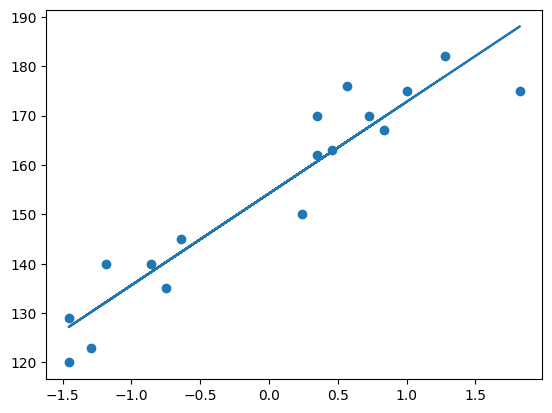

In [84]:
plt.scatter(X_train, Y_train)
plt.plot (X_train, regression.predict(X_train))

## Predection for Test data

In [ ]:
## feeding test input data for the model
## predict contains the model learning + X_test contains model input = now just need to show y_test & can check metrics 
Y_pred = regression.predict(X_test)

In [94]:
## Perfromance Metrices - to test y_test by passing y_preds
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [111]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)

MSE: 83.3140346124661
MAE: 7.457487942647584
RMSE: 9.127652196072443


In [112]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

n = X_test.shape[0]   # number of rows
p = X_test.shape[1]   # number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("Adjusted R2:", adj_r2)

R2 Score: 0.26792647155265337
Adjusted R2: 0.08490808944081674


## Predection on new data point

In [ ]:
regression.predict(scaler.transform([[150]]))   ## rememeber to scale the data if done above

C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([233.72271874])